In [1]:
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Using plaidml.keras.backend backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
import import_ipynb
from Dataset_utils import get_imgs_labels, get_labels_enc

train_imgs, train_labels, validation_imgs, validation_labels = get_imgs_labels()
train_labels_enc, validation_labels_enc = get_labels_enc()

importing Jupyter notebook from Dataset_utils.ipynb


Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


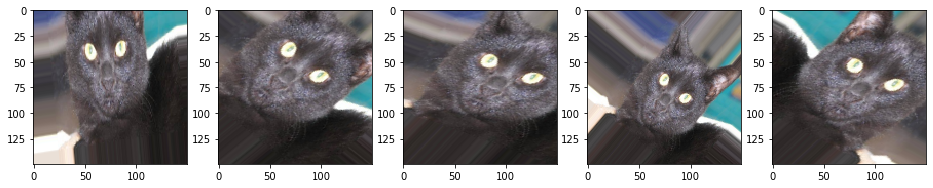

In [4]:
img_id = 1001
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


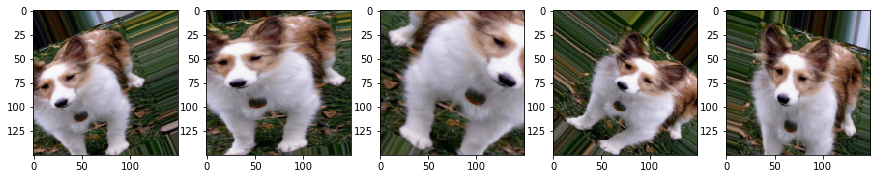

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [6]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

INFO:plaidml:Opening device "opencl_amd_hainan.0"


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100


INFO:plaidml:Analyzing Ops: 100 of 297 operations complete


100/100 [==============================] - 65s 650ms/step - loss: 0.6928 - acc: 0.5103 - val_loss: 0.6794 - val_acc: 0.6080
Epoch 2/100
100/100 [==============================] - 50s 497ms/step - loss: 0.6787 - acc: 0.5680 - val_loss: 0.6625 - val_acc: 0.6320
Epoch 3/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6678 - acc: 0.5830 - val_loss: 0.6404 - val_acc: 0.6340
Epoch 4/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6517 - acc: 0.6097 - val_loss: 0.6421 - val_acc: 0.6390
Epoch 5/100
100/100 [==============================] - 50s 495ms/step - loss: 0.6495 - acc: 0.6077 - val_loss: 0.6455 - val_acc: 0.6250
Epoch 6/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6386 - acc: 0.6270 - val_loss: 0.6290 - val_acc: 0.6450
Epoch 7/100
100/100 [==============================] - 49s 494ms/step - loss: 0.6372 - acc: 0.6250 - val_loss: 0.6208 - val_acc: 0.6480
Epoch 8/100
100/100 [==============================] - 50s 4

Epoch 61/100
100/100 [==============================] - 50s 501ms/step - loss: 0.4593 - acc: 0.7813 - val_loss: 0.3904 - val_acc: 0.8070
Epoch 62/100
100/100 [==============================] - 49s 494ms/step - loss: 0.4625 - acc: 0.7860 - val_loss: 0.3896 - val_acc: 0.8160
Epoch 63/100
100/100 [==============================] - 50s 496ms/step - loss: 0.4540 - acc: 0.7783 - val_loss: 0.4944 - val_acc: 0.7840
Epoch 64/100
100/100 [==============================] - 49s 492ms/step - loss: 0.4666 - acc: 0.7800 - val_loss: 0.4012 - val_acc: 0.8180
Epoch 65/100
100/100 [==============================] - 49s 492ms/step - loss: 0.4517 - acc: 0.7903 - val_loss: 0.3991 - val_acc: 0.8190
Epoch 66/100
100/100 [==============================] - 49s 494ms/step - loss: 0.4504 - acc: 0.7903 - val_loss: 0.4504 - val_acc: 0.7910
Epoch 67/100
100/100 [==============================] - 49s 493ms/step - loss: 0.4570 - acc: 0.7787 - val_loss: 0.4004 - val_acc: 0.8070
Epoch 68/100
100/100 [===================

In [9]:
# save model
import os

if(not os.path.exists('saved_models')):
    os.mkdir('saved_models')
model.save('saved_models/cnn_model_with_image_augmentation.h5')

In [10]:
# save history
import pickle
import os

if(not os.path.exists('saved_history')):
    os.mkdir('saved_history')
f = open('saved_history/cnn_model_with_image_augmentation.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [11]:
# load history
import pickle

file = 'saved_history/cnn_model_with_image_augmentation.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

importing Jupyter notebook from model_summary.ipynb


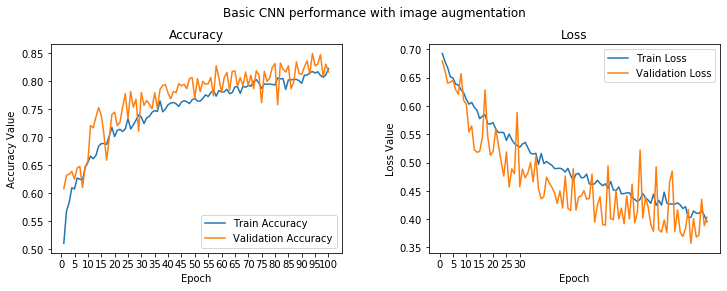

In [12]:
# plot graph
import import_ipynb
from model_summary import plot_graph

performance = 'Basic CNN performance with image augmentation'
plot_graph(performance, hist, 100)